<a href="https://colab.research.google.com/github/prashant-gulati/portfolio/blob/main/word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credits: https://jaketae.github.io/study/word2vec/

In [ ]:
text = '''Machine learning is the study of computer algorithms that \
improve automatically through experience. It is seen as a \
subset of artificial intelligence. Machine learning algorithms \
build a mathematical model based on sample data, known as \
training data, in order to make predictions or decisions without \
being explicitly programmed to do so. Machine learning algorithms \
are used in a wide variety of applications, such as email filtering \
and computer vision, where it is difficult or infeasible to develop \
conventional algorithms to perform the needed tasks.'''

In [ ]:
import re

def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

In [ ]:
tokens = tokenize(text)
print(len(tokens))
print(tokens)

84
['machine', 'learning', 'is', 'the', 'study', 'of', 'computer', 'algorithms', 'that', 'improve', 'automatically', 'through', 'experience', 'it', 'is', 'seen', 'as', 'a', 'subset', 'of', 'artificial', 'intelligence', 'machine', 'learning', 'algorithms', 'build', 'a', 'mathematical', 'model', 'based', 'on', 'sample', 'data', 'known', 'as', 'training', 'data', 'in', 'order', 'to', 'make', 'predictions', 'or', 'decisions', 'without', 'being', 'explicitly', 'programmed', 'to', 'do', 'so', 'machine', 'learning', 'algorithms', 'are', 'used', 'in', 'a', 'wide', 'variety', 'of', 'applications', 'such', 'as', 'email', 'filtering', 'and', 'computer', 'vision', 'where', 'it', 'is', 'difficult', 'or', 'infeasible', 'to', 'develop', 'conventional', 'algorithms', 'to', 'perform', 'the', 'needed', 'tasks']


In [ ]:
def mapping(tokens):
    word_to_id = {}
    id_to_word = {}

    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token

    return word_to_id, id_to_word

In [ ]:
word_to_id, id_to_word = mapping(tokens)
word_to_id

{'infeasible': 0,
 'it': 1,
 'study': 2,
 'conventional': 3,
 'improve': 4,
 'build': 5,
 'to': 6,
 'order': 7,
 'needed': 8,
 'seen': 9,
 'vision': 10,
 'model': 11,
 'of': 12,
 'are': 13,
 'known': 14,
 'such': 15,
 'applications': 16,
 'subset': 17,
 'without': 18,
 'through': 19,
 'experience': 20,
 'or': 21,
 'as': 22,
 'do': 23,
 'variety': 24,
 'filtering': 25,
 'so': 26,
 'develop': 27,
 'being': 28,
 'in': 29,
 'on': 30,
 'perform': 31,
 'used': 32,
 'learning': 33,
 'that': 34,
 'artificial': 35,
 'machine': 36,
 'make': 37,
 'wide': 38,
 'data': 39,
 'a': 40,
 'explicitly': 41,
 'difficult': 42,
 'email': 43,
 'is': 44,
 'intelligence': 45,
 'and': 46,
 'programmed': 47,
 'predictions': 48,
 'training': 49,
 'the': 50,
 'computer': 51,
 'mathematical': 52,
 'based': 53,
 'sample': 54,
 'decisions': 55,
 'where': 56,
 'tasks': 57,
 'algorithms': 58,
 'automatically': 59}

In [ ]:
import numpy as np

np.random.seed(42)


def generate_training_data(tokens, word_to_id, window):
    X = []
    y = []
    n_tokens = len(tokens)

    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - window), i),
            range(i, min(n_tokens, i + window + 1))
        )
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))

    return np.asarray(X), np.asarray(y)

In [ ]:
def concat(*iterables):
    for iterable in iterables:
        yield from iterable

In [ ]:
concat([1,2],[3,4])
print(concat)

<function concat at 0x7f2667edc540>


In [ ]:
def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res

In [ ]:
X, y = generate_training_data(tokens, word_to_id, 2)
print(X.shape)
print(y.shape)

(330, 60)
(330, 60)


At this point, you might be wondering how it is that training a neural network that predicts some nearby context word given an input token can be used to embed words into vectors. After all, the output of the network is going to be some probability vector that passed through a softmax layer, not an embedding vector.

This is entirely correct, and this is a question that came to my mind as well. However, this is the part that gets the most interesting: the rows of the intermediate weight matrix is the embedding we are looking for!

embeddings are simply the rows of the first weight matrix, denoted as W1

In [ ]:
# The representation we will use for the model is a Python dictionary, whose values are the weight matrices and keys,
# the name with which we will refer to the weight matrices.
# In accordance with the nomenclature established earlier, we stick with "w1" and "w2" to refer to these weights

def init_network(vocab_size, n_embedding):
    model = {
        "w1": np.random.randn(vocab_size, n_embedding),
        "w2": np.random.randn(n_embedding, vocab_size)
    }
    return model

In [ ]:
model = init_network(len(word_to_id), 10)

In [ ]:
def forward(model, X, return_cache=True):
    cache = {}

    cache["a1"] = X @ model["w1"]
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = softmax(cache["a2"])

    if not return_cache:
        return cache["z"]
    return cache

In [ ]:
def softmax(X):
    res = []
    for x in X:
        exp = np.exp(x)
        res.append(exp / exp.sum())
    return res

In [ ]:
(X @ model["w1"]).shape

(330, 10)

In [ ]:
(X @ model["w1"] @ model["w2"]).shape

(330, 60)

In [ ]:
def backward(model, X, y, alpha):
    cache  = forward(model, X)
    da2 = cache["z"] - y
    dw2 = cache["a1"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = X.T @ da1
    assert(dw2.shape == model["w2"].shape)
    assert(dw1.shape == model["w1"].shape)
    model["w1"] -= alpha * dw1
    model["w2"] -= alpha * dw2
    return cross_entropy(cache["z"], y)

In [ ]:
def cross_entropy(z, y):
    return - np.sum(np.log(z) * y)

In [ ]:
#inference before training
learning = one_hot_encode(word_to_id["learning"], len(word_to_id))
result = forward(model, [learning], return_cache=False)[0]

for word in (id_to_word[id] for id in np.argsort(result)[::-1]):
    print(word)

artificial
email
as
model
known
are
is
do
a
based
in
to
mathematical
computer
predictions
data
applications
and
seen
training
algorithms
the
variety
needed
sample
tasks
improve
it
where
that
order
wide
develop
such
without
on
conventional
make
learning
machine
infeasible
perform
intelligence
decisions
of
experience
used
through
subset
vision
so
build
study
automatically
filtering
difficult
being
programmed
explicitly
or


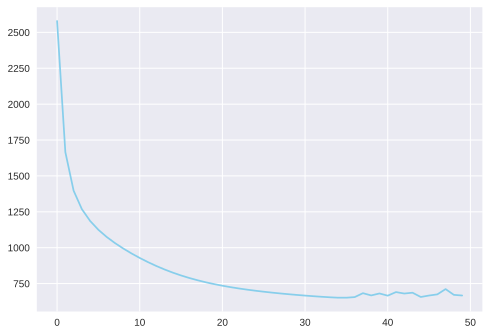

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn-v0_8")

n_iter = 50
learning_rate = 0.05

history = [backward(model, X, y, learning_rate) for _ in range(n_iter)]

plt.plot(range(len(history)), history, color="skyblue")
plt.show()

In [ ]:
#inference after training
learning = one_hot_encode(word_to_id["intelligence"], len(word_to_id))
result = forward(model, [learning], return_cache=False)[0]

for word in (id_to_word[id] for id in np.argsort(result)[::-1]):
    print(word)

of
artificial
machine
learning
algorithms
a
and
is
to
needed
so
where
intelligence
build
computer
are
based
develop
study
vision
mathematical
the
do
it
through
applications
automatically
that
email
model
programmed
experience
on
tasks
wide
difficult
subset
improve
used
filtering
data
predictions
order
as
decisions
sample
conventional
without
make
seen
perform
training
variety
known
explicitly
or
infeasible
such
in
being


In [ ]:
def get_embedding(model, word):
    try:
        idx = word_to_id[word]
    except KeyError:
        print("`word` not in corpus")
    one_hot = one_hot_encode(idx, len(word_to_id))
    return forward(model, one_hot)["a1"]

In [ ]:
get_embedding(model, "machine")

array([-0.19086805,  1.86160296,  0.18627177, -0.90632819,  1.22975763,
       -1.3728291 , -0.24169556, -0.51010428,  0.86339066,  0.49500644])